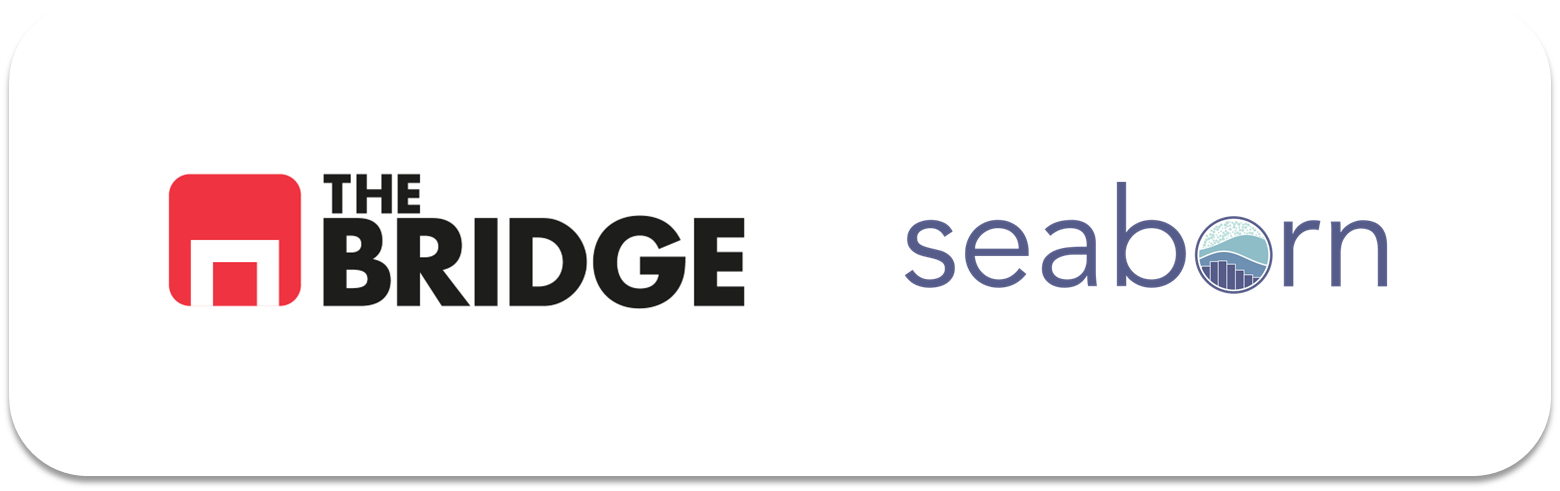

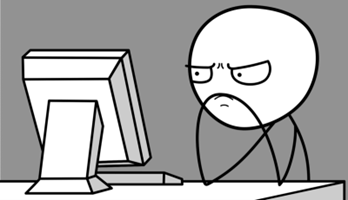

Para ejercitarte y afianzar lo aprendido sobre visualización de datos de variables columnas a la vez, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook:

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Ejercicio 1

Carga los siguientes datasets que necesitarás para poder hacer el resto de ejercicios:
1. Titanic, "./data/titanic.csv"
2. Viajes, "./data/dataset_viajes_jun23"

In [4]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_viajes_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")

### Ejercicio 2

Crea una función que tenga como argumentos un dataframe, el nombre de una columa categórica, el nombre de otra columna categórica y que haga lo siguiente:
1. Dibuje una combinación de gráficas con las frecuencias absolutas de cada columna categórica y una figura con el catplot de las dos columnas usando la segunda como valor para el argumento col. Utiliza countplot para las frecuencias y un subplots de 1 fila y dos columnas, añade una figura con catplot para la comparación. 
2. Devuelva la tabla de contigencia de las dos columnas.


In [13]:
def funcion_rep(df, col1, col2):
    fig, axs= plt.subplots(nrows = 1, ncols = 2, figsize = (50,20))
    sns.countplot(data=df,x=col1,hue=col2, ax=axs[0])
    sns.countplot(data=df,x=col2,hue=col1, ax=axs[1])
    sns.catplot(data=df, x=col1, col=col2, kind="violin")
    plt.legend()


/var/folders/cz/cnnldf8n7_9_gklt41tgbm380000gn/T/ipykernel_2060/2752871043.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


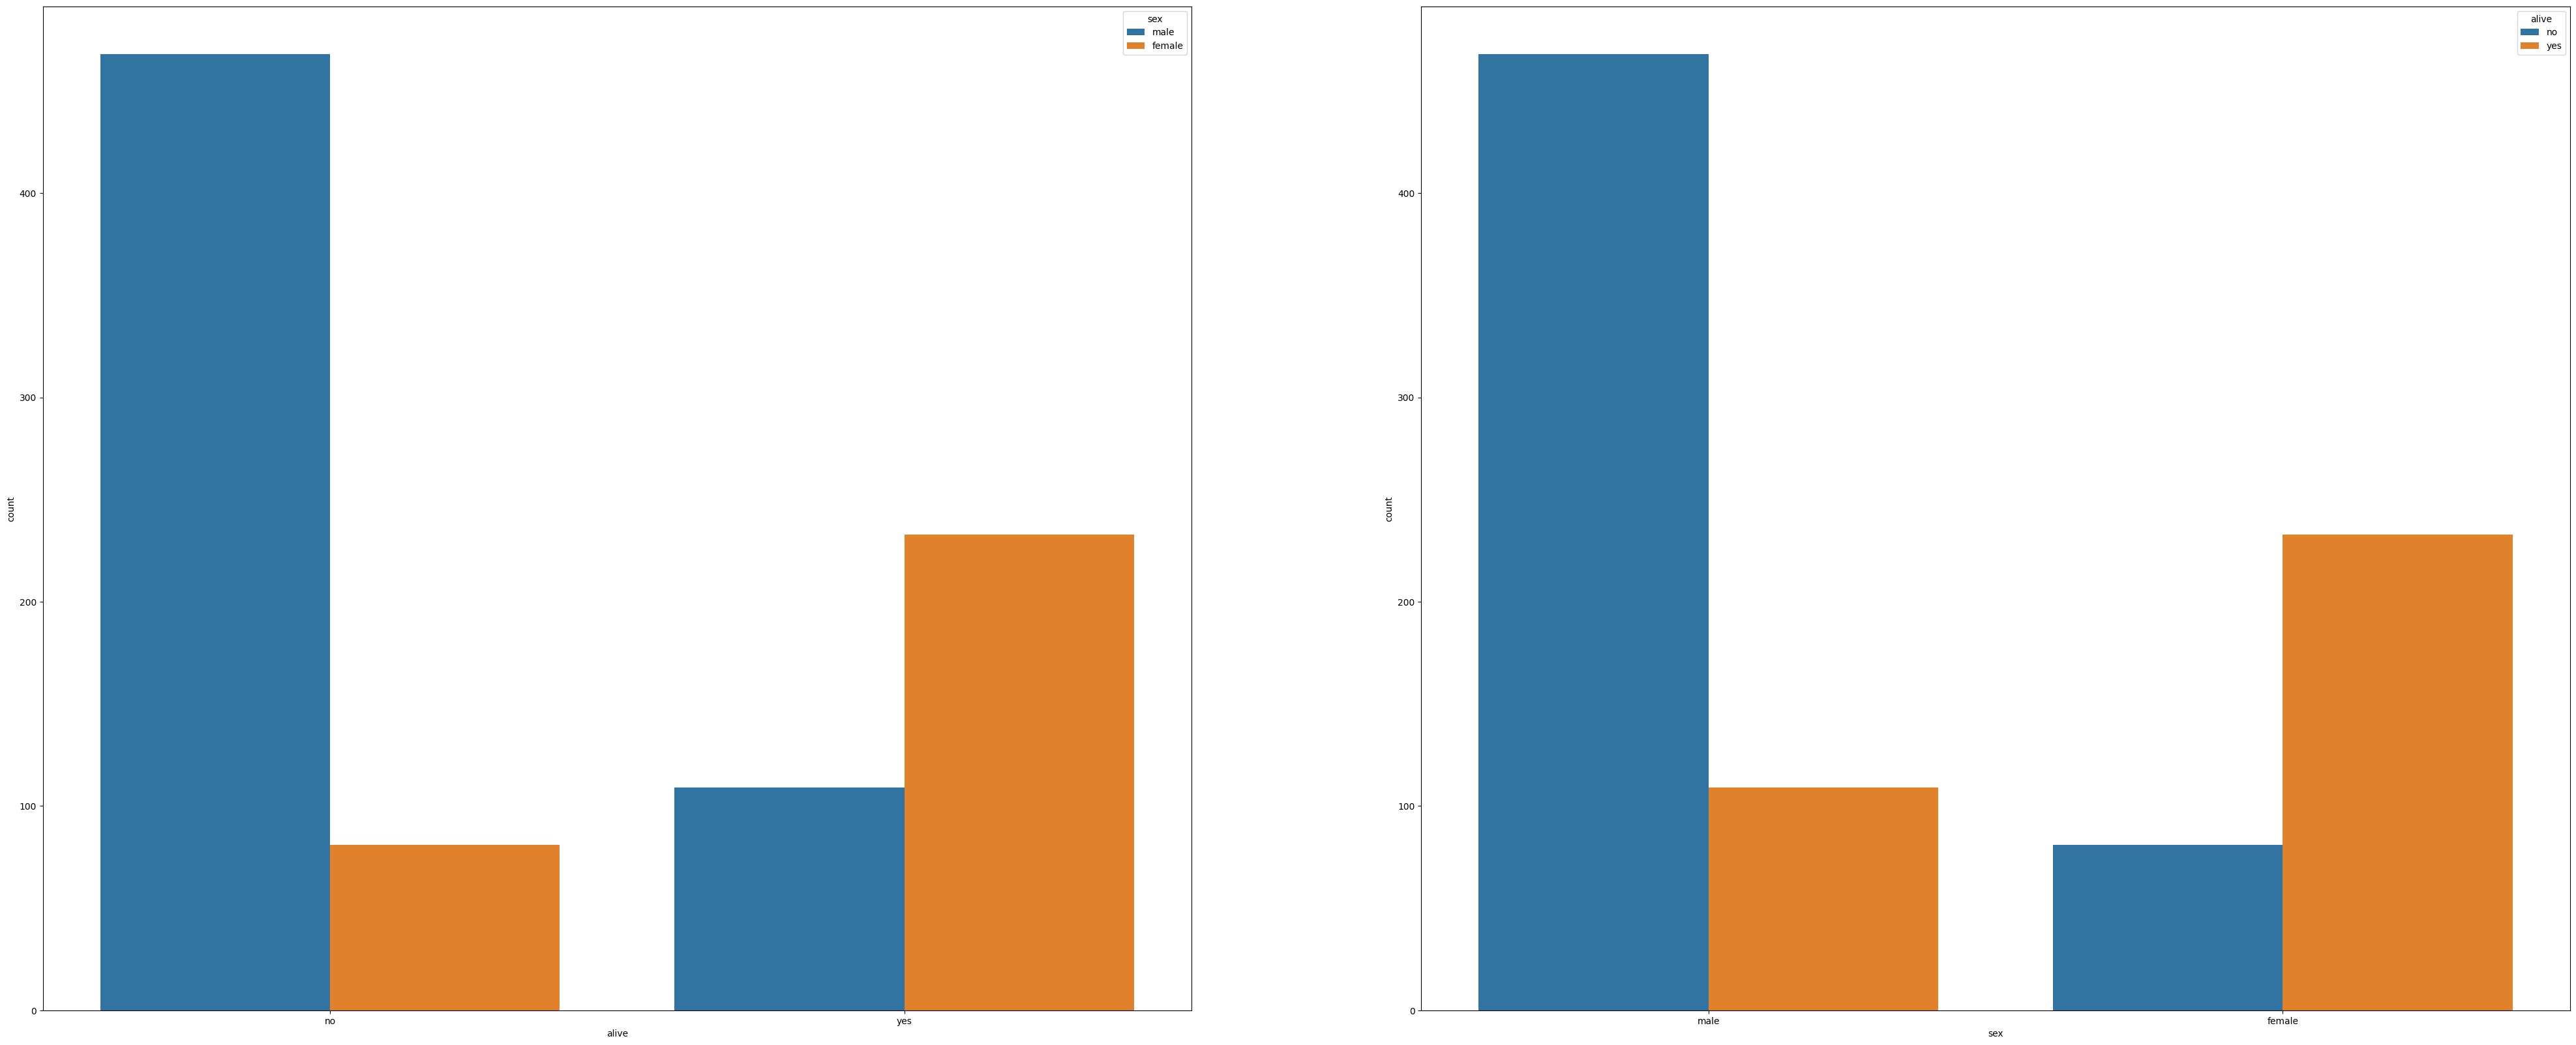

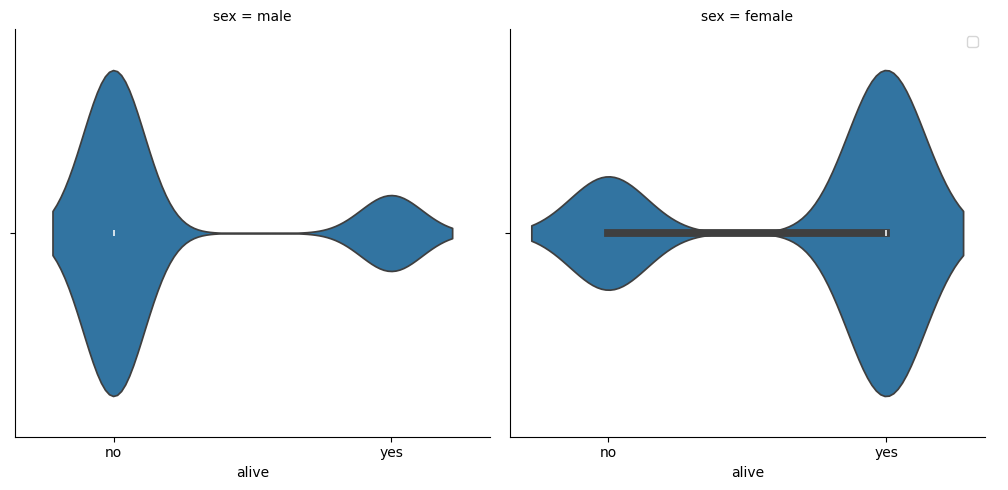

In [14]:
funcion_rep(df_titanic, "alive","sex")

### Ejercicio 3

Aplicalo para comparar por un lado "alive" y "who" y "alive" y "class" del dataset del titanic.

#### Alive y who

/var/folders/cz/cnnldf8n7_9_gklt41tgbm380000gn/T/ipykernel_2060/2752871043.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


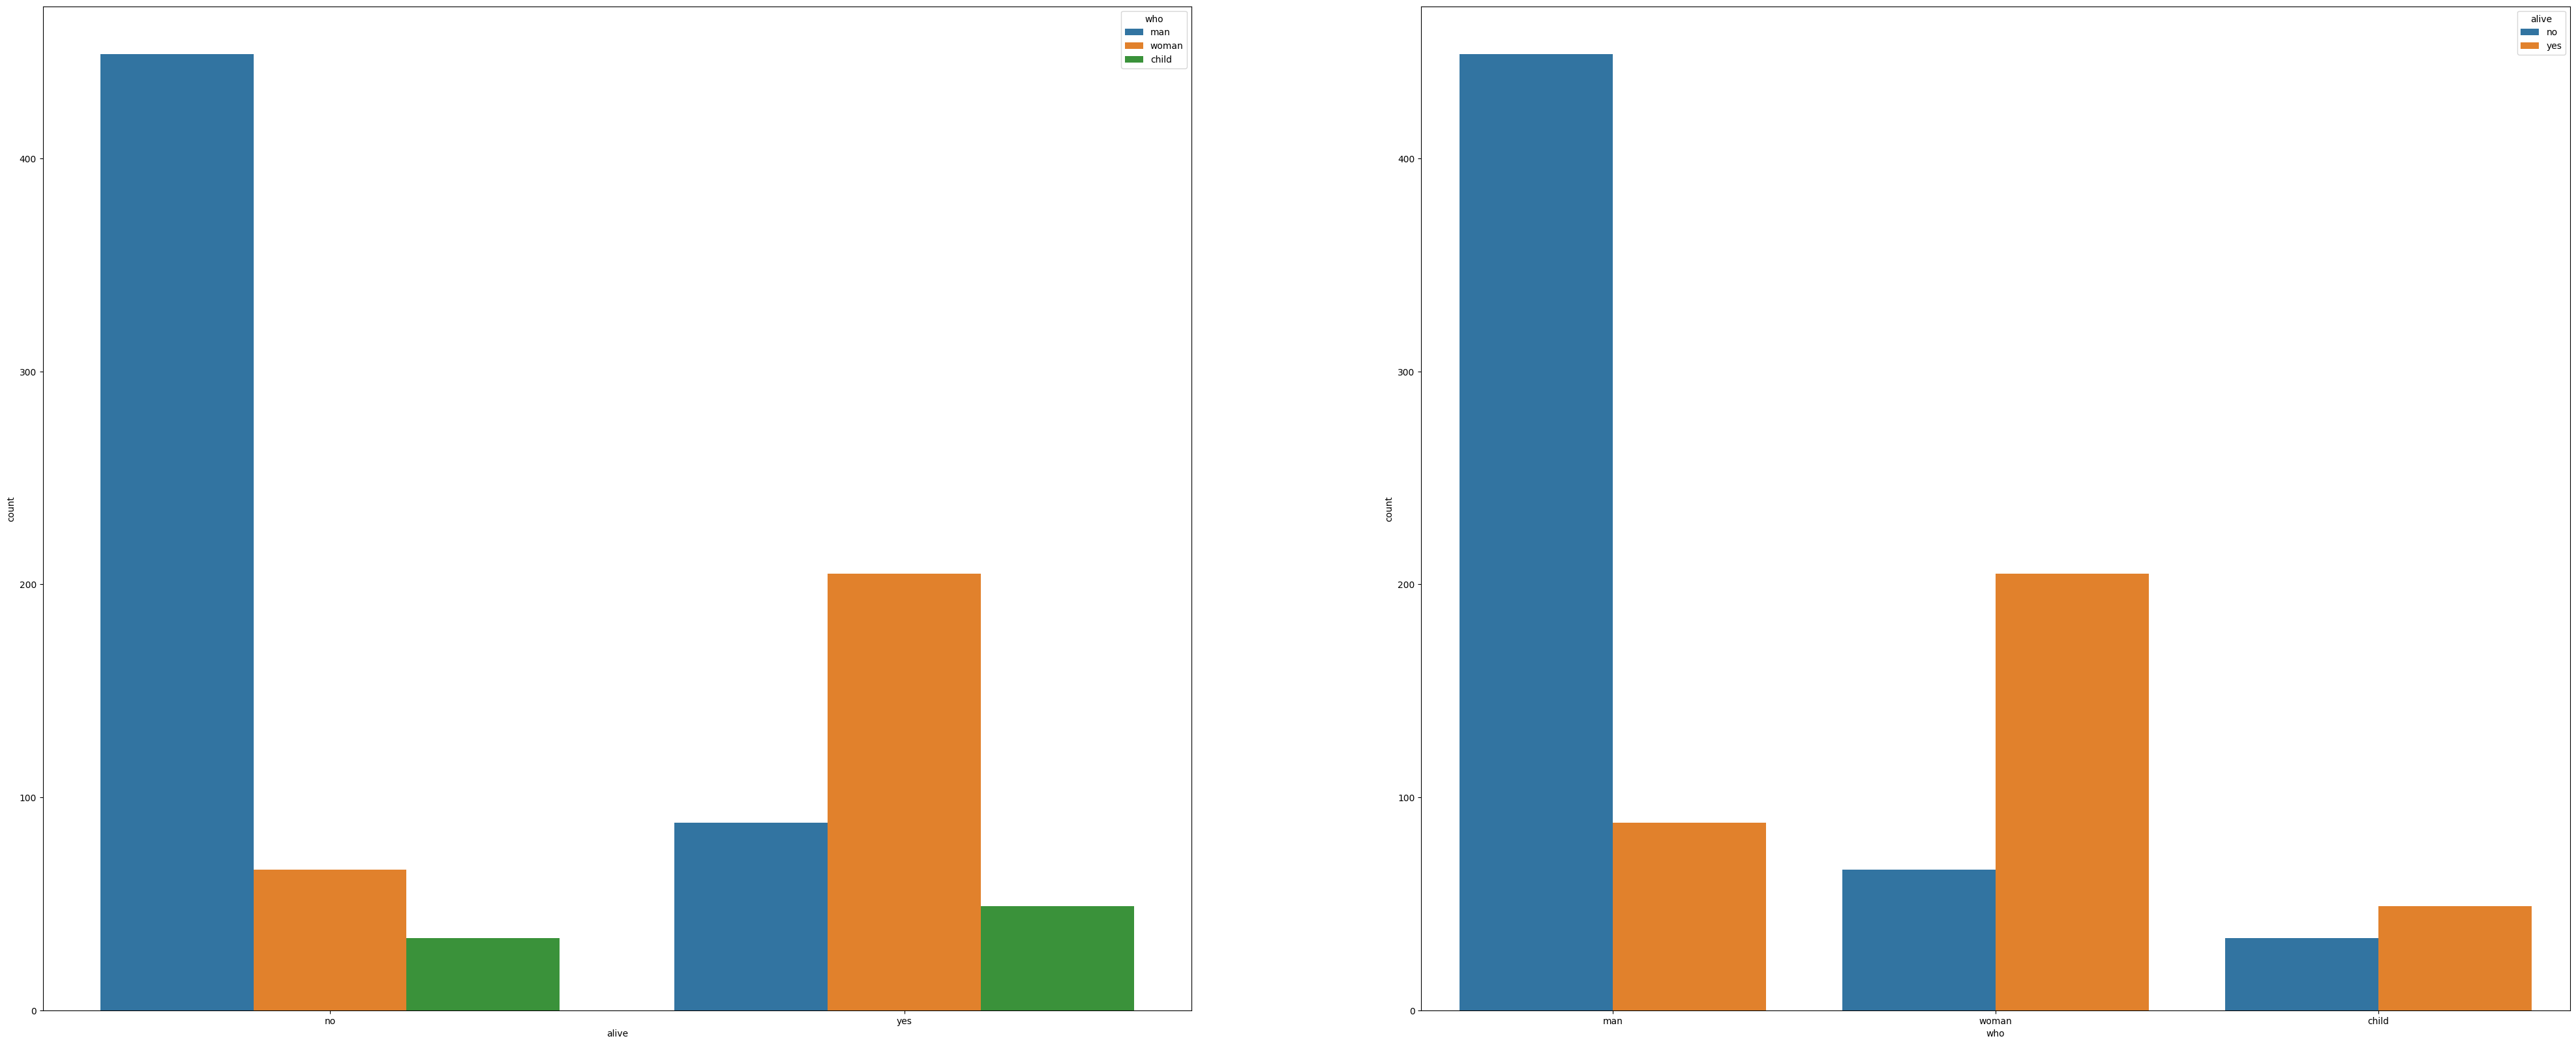

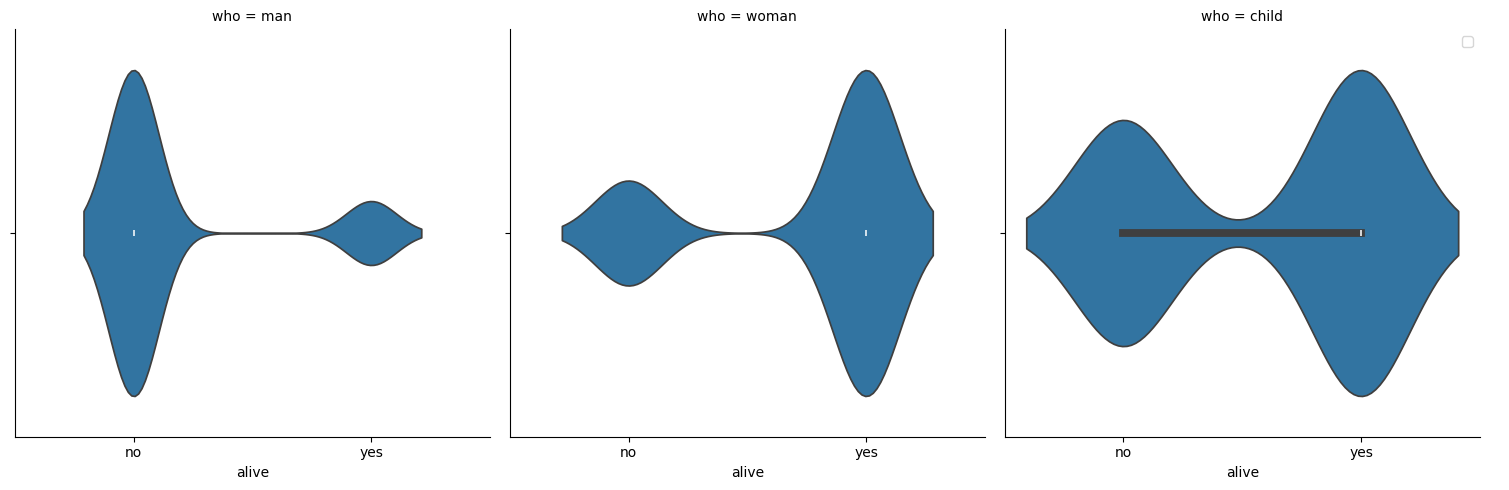

In [16]:
funcion_rep(df_titanic, "alive","who")

#### Alive y Class

/var/folders/cz/cnnldf8n7_9_gklt41tgbm380000gn/T/ipykernel_2060/2752871043.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


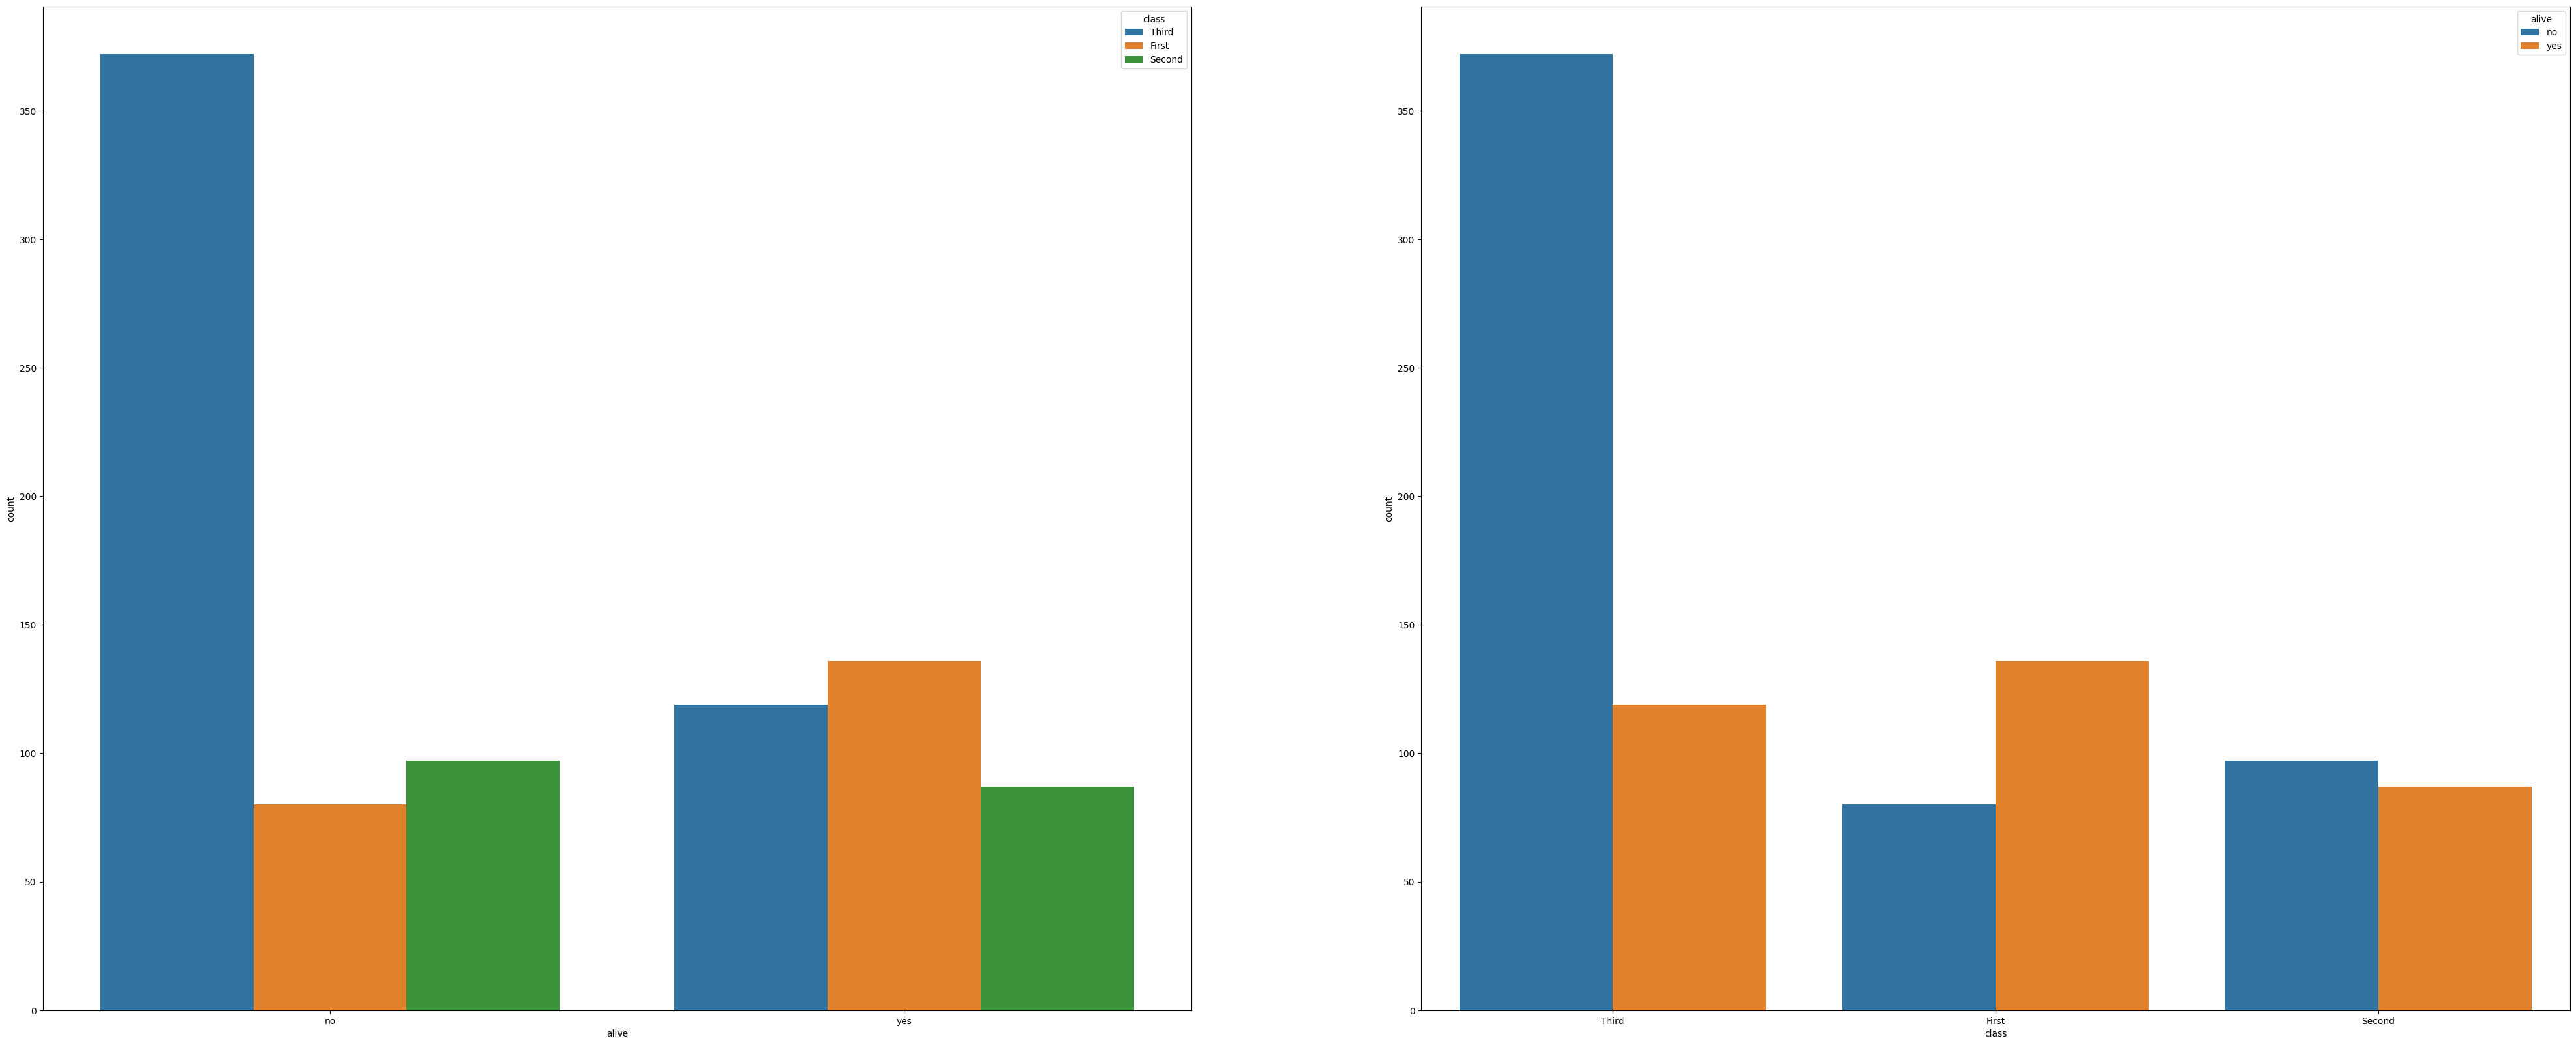

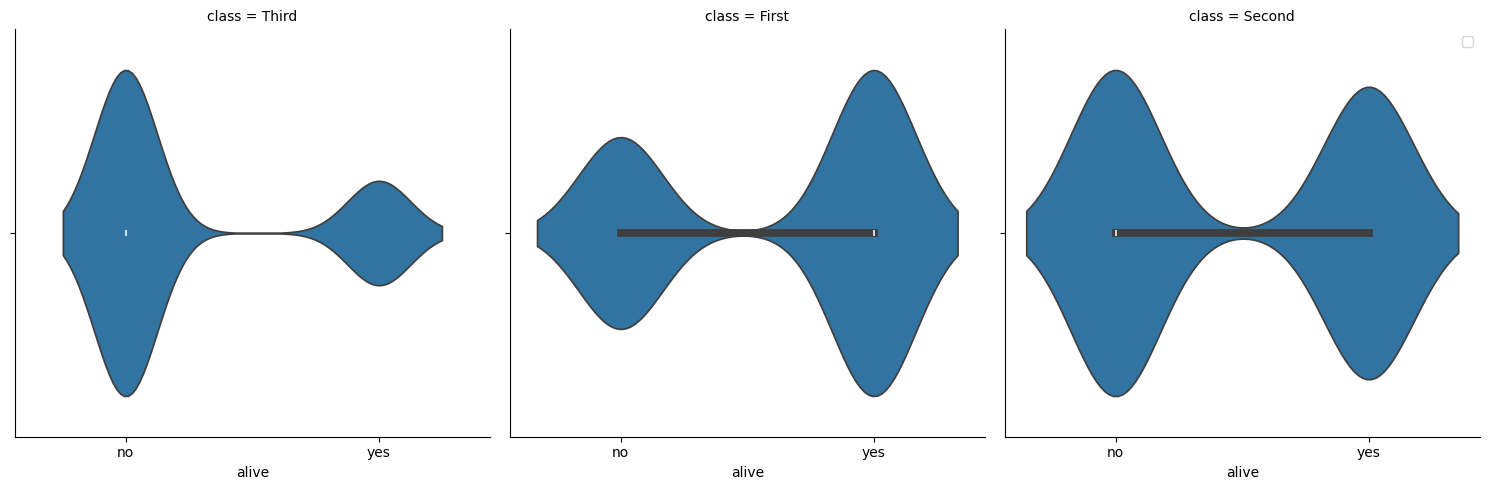

In [17]:
funcion_rep(df_titanic, "alive","class")

### Ejercicio 4

Crea una función que compare ahora una variable categórica y otra numérica. Para ello, se aconseja reutilizar código de las funciones que viste en el grupo anterior de ejercicios para pintar histogramas, crea una función que haga lo siguiente:
1. Admita tres parámetros o argumentos: Un dataframe, el nombre de una columna categórica del mismo, el nombre de una columna numérica del mismo.
2. Cree una matriz de gráficos, tantas como valores de la variable categórica, con un máximo de tres columnas por fila y todas las filas que necesite.
3. Asigne a cada gráfica el histograma de la variable numérica pero sólo para las filas que tengan el valor que corresponda de la variable categórica (así si el primer valor de la categórica es Val1 y la variable numérica se llama Num1, en la primera gráfica estará el histograma de Num1 sólo para las filas que tengan Val1)
4. Añada el título "Histograma de {variable numerica} para el valor {valor correspondiente de la categórica} a cada gráfica.

In [78]:
list(df_titanic.who.value_counts().index)

['man', 'woman', 'child']

In [83]:
def funcion(df,cat, num,barras, norm=False):
   if len(df[cat].value_counts())%3 == 0:
       row = (len(df[cat].value_counts())//3)
       print(1,row)
   else:
       row = len(df[cat].value_counts())//3 +1
       print(2,row)
   i = 0
   fig, axs= plt.subplots(nrows = row, ncols = 3, figsize = (40,20))
   while i < len(df[cat].value_counts()):
      for j in range(row):
         for z in range(3):
            sns.histplot(df[num].loc[df[cat]==df[cat].value_counts().index[i]],kde=norm, bins=barras,ax = axs[j,z])
            axs[j,z].set_title(f'Histograma de {num} para {df[cat].value_counts().index[i]}')
            axs[j,z].set_xlim(df[num].loc[df[cat]==df[cat].value_counts().index[i]].min(),df[num].loc[df[cat]==df[cat].value_counts().index[i]].max())
            i = i+1
            if i == len(df[cat].value_counts()):
               return False
    

### Ejercicio 5

Aplica la función anterior para ver los histogramas de "ingresos" y "consumo_kg" por compañía aérea del dataset de viajes. ¿Qué argumentos añadirías a la función para poder generar mejores visualizaciones?

#### Aircompany e Ingresos

2 2


False

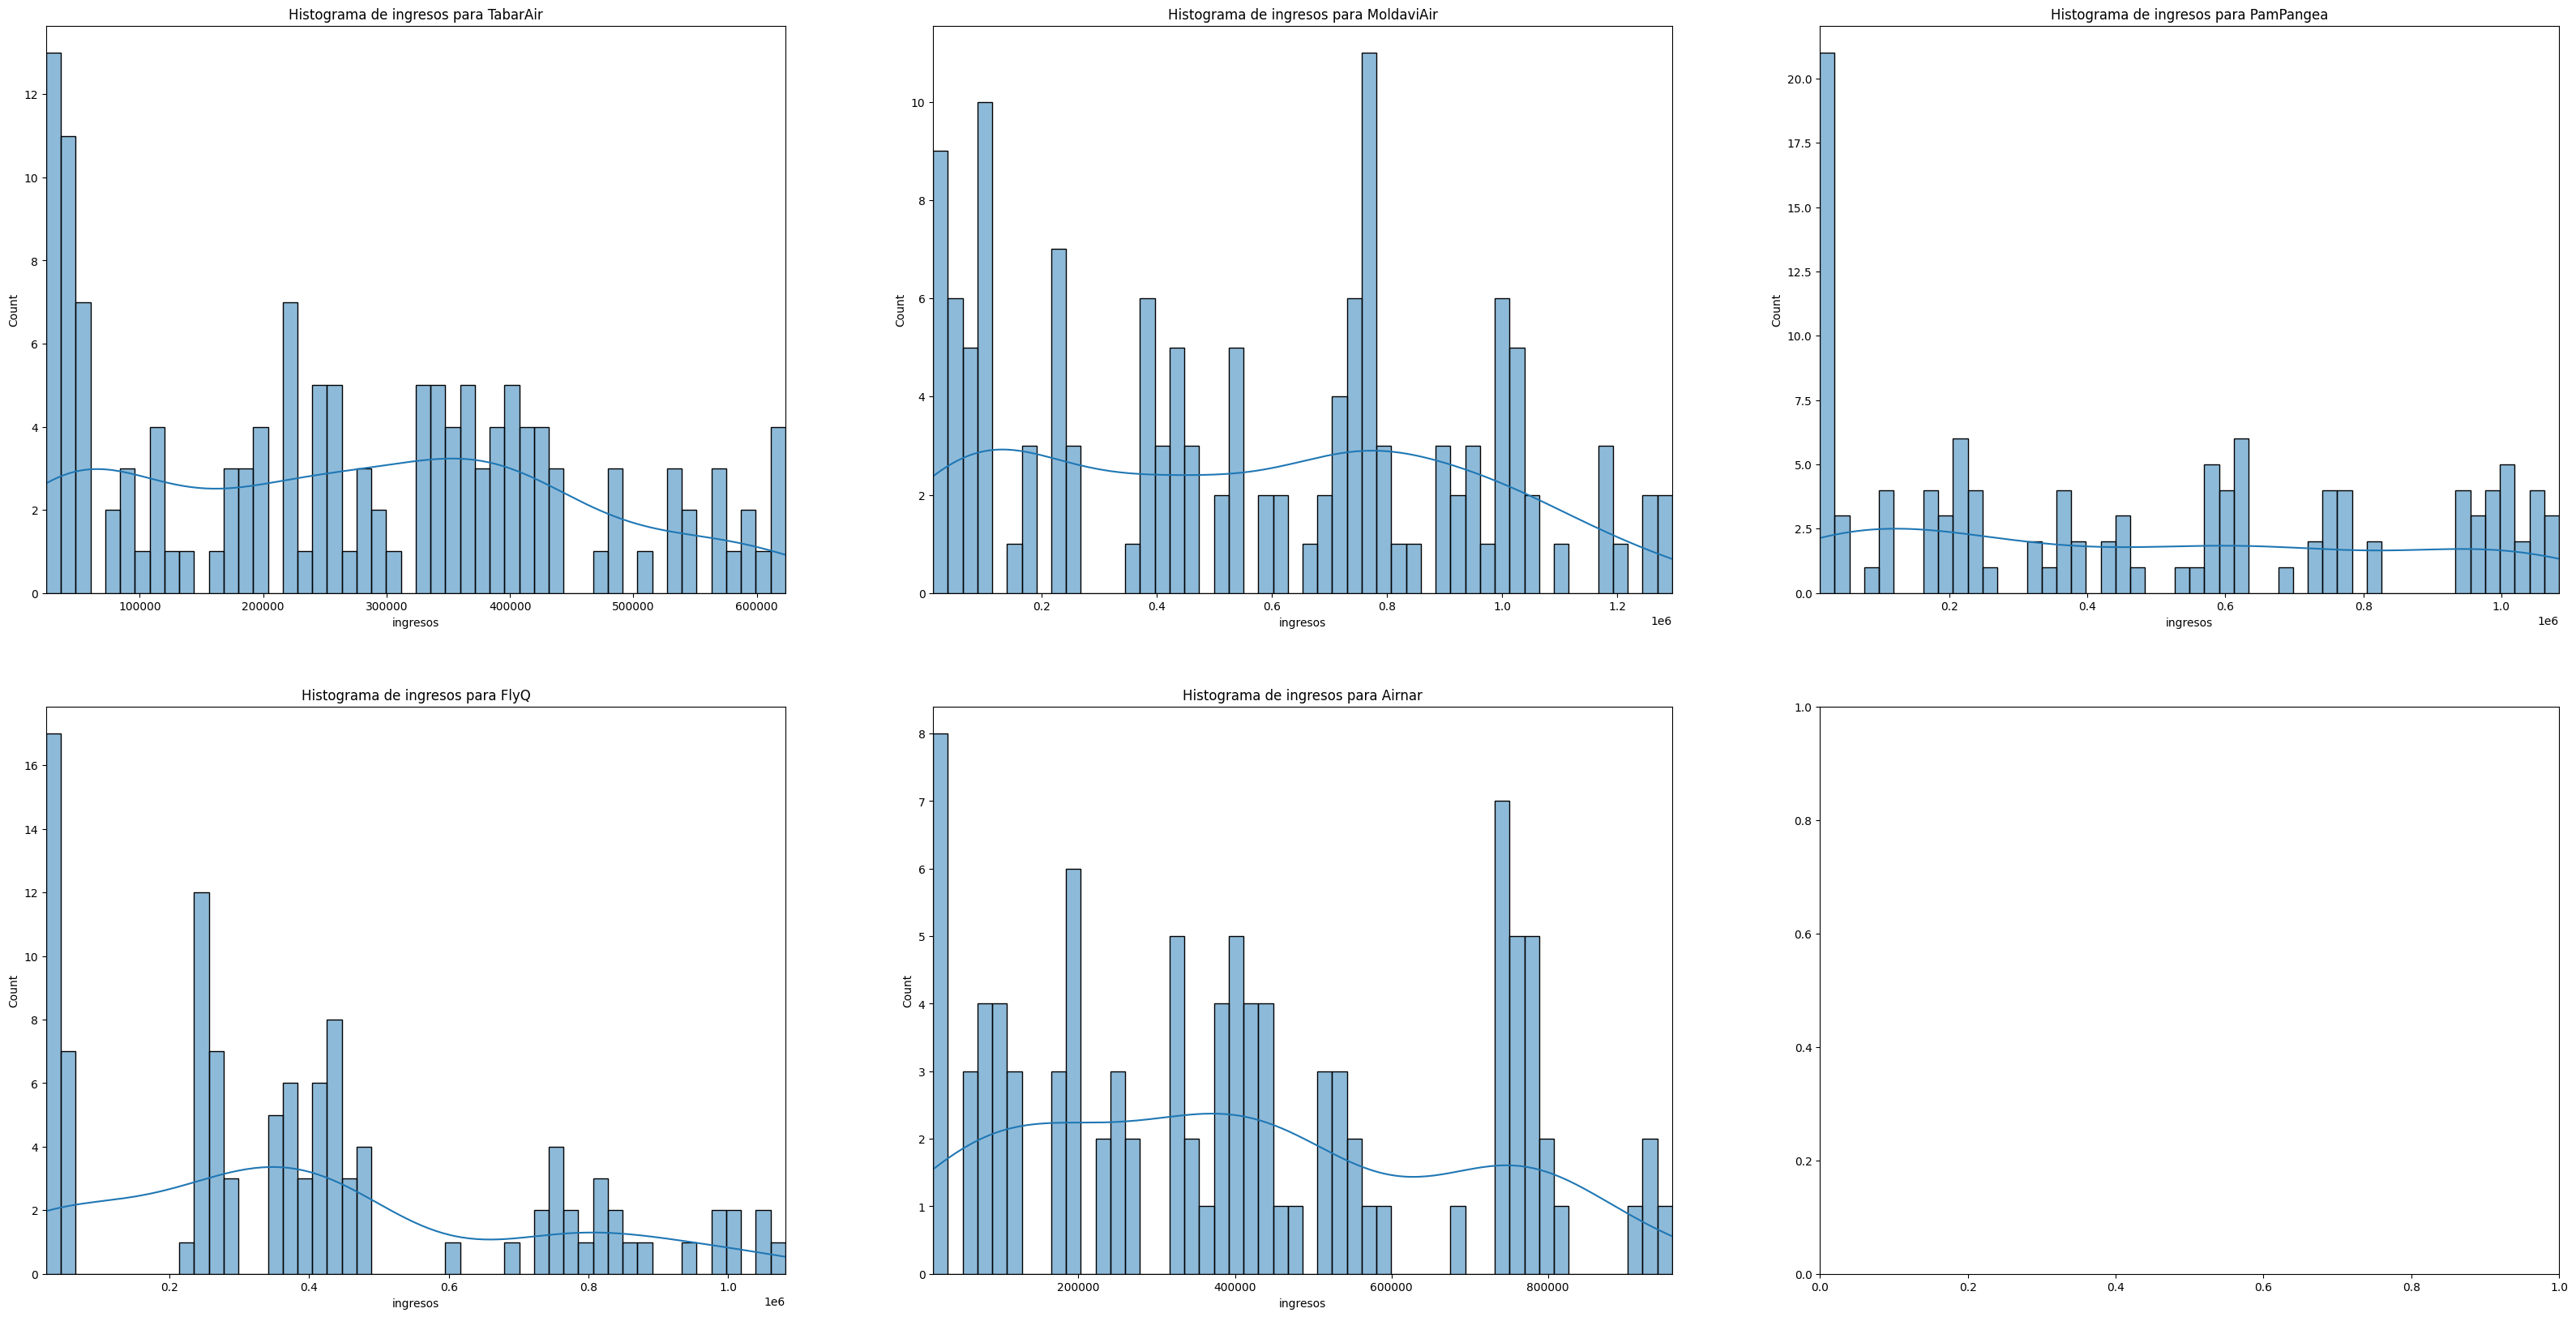

In [84]:
funcion(df_viajes_jun, 'aircompany', 'ingresos',50,True)

#### Aircompany y Consumo_kg

2 2


False

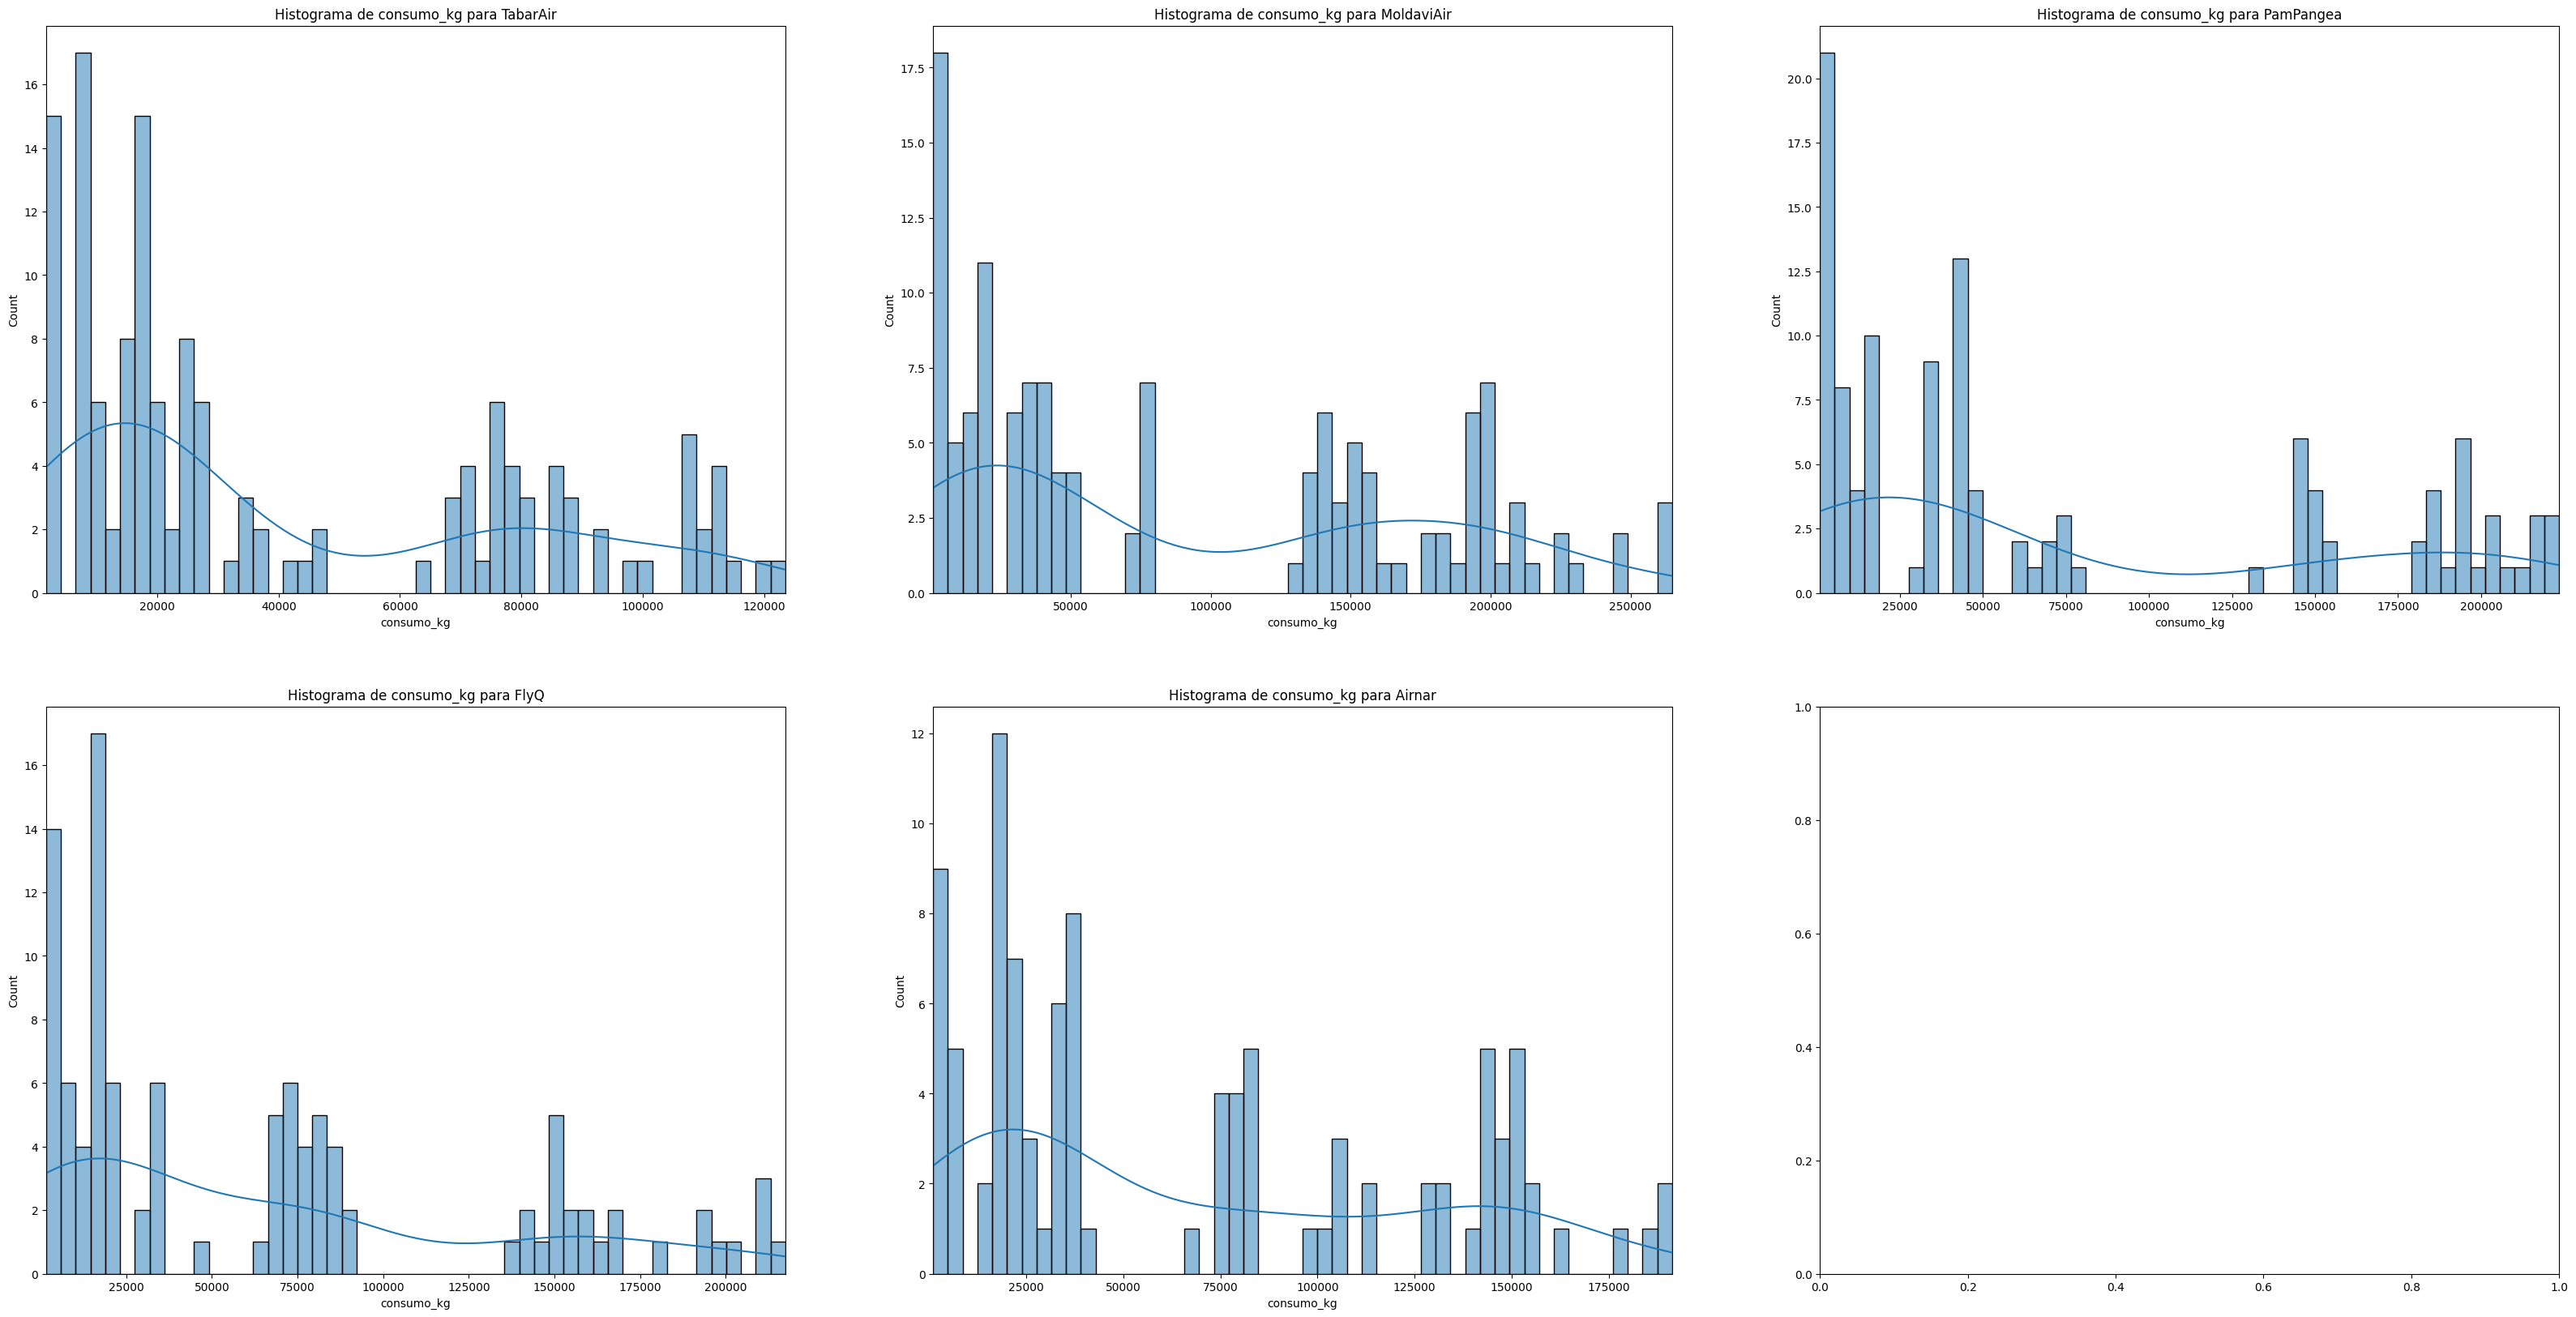

In [85]:
funcion(df_viajes_jun, 'aircompany', 'consumo_kg',50,True)

### Ejercicio 6

Crea una función para pintar diagramas de dispersion que tenga cinco argumentos:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos.

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn que uses. [Nota: como en todos los ejercicios anteriores, debes usar Seaborn para pintar]

In [96]:
def funcion_6(df, num, num2, cat = None):
    fig, axs= plt.subplots(figsize = (40,20))
    if (num != num2) and cat!=None:
        sns.scatterplot(data=df, x=num, y=num2, size=cat, hue=cat)
    elif (num != num2) and cat==None:
        sns.scatterplot(data=df, x=num, y=num2)
    elif (num == num2):
        print(f"las variables numericas {num} y {num2} son las mismas, introuce una de las dos diferente")


### Ejercicio 7

Usa la función del ejercicio anterior para pintar la comparativa entre ingresos, consumo_kg y compañía aérea. ¿Si quisieras usarla como visualización que quitarías, añadirías o remarcarías?

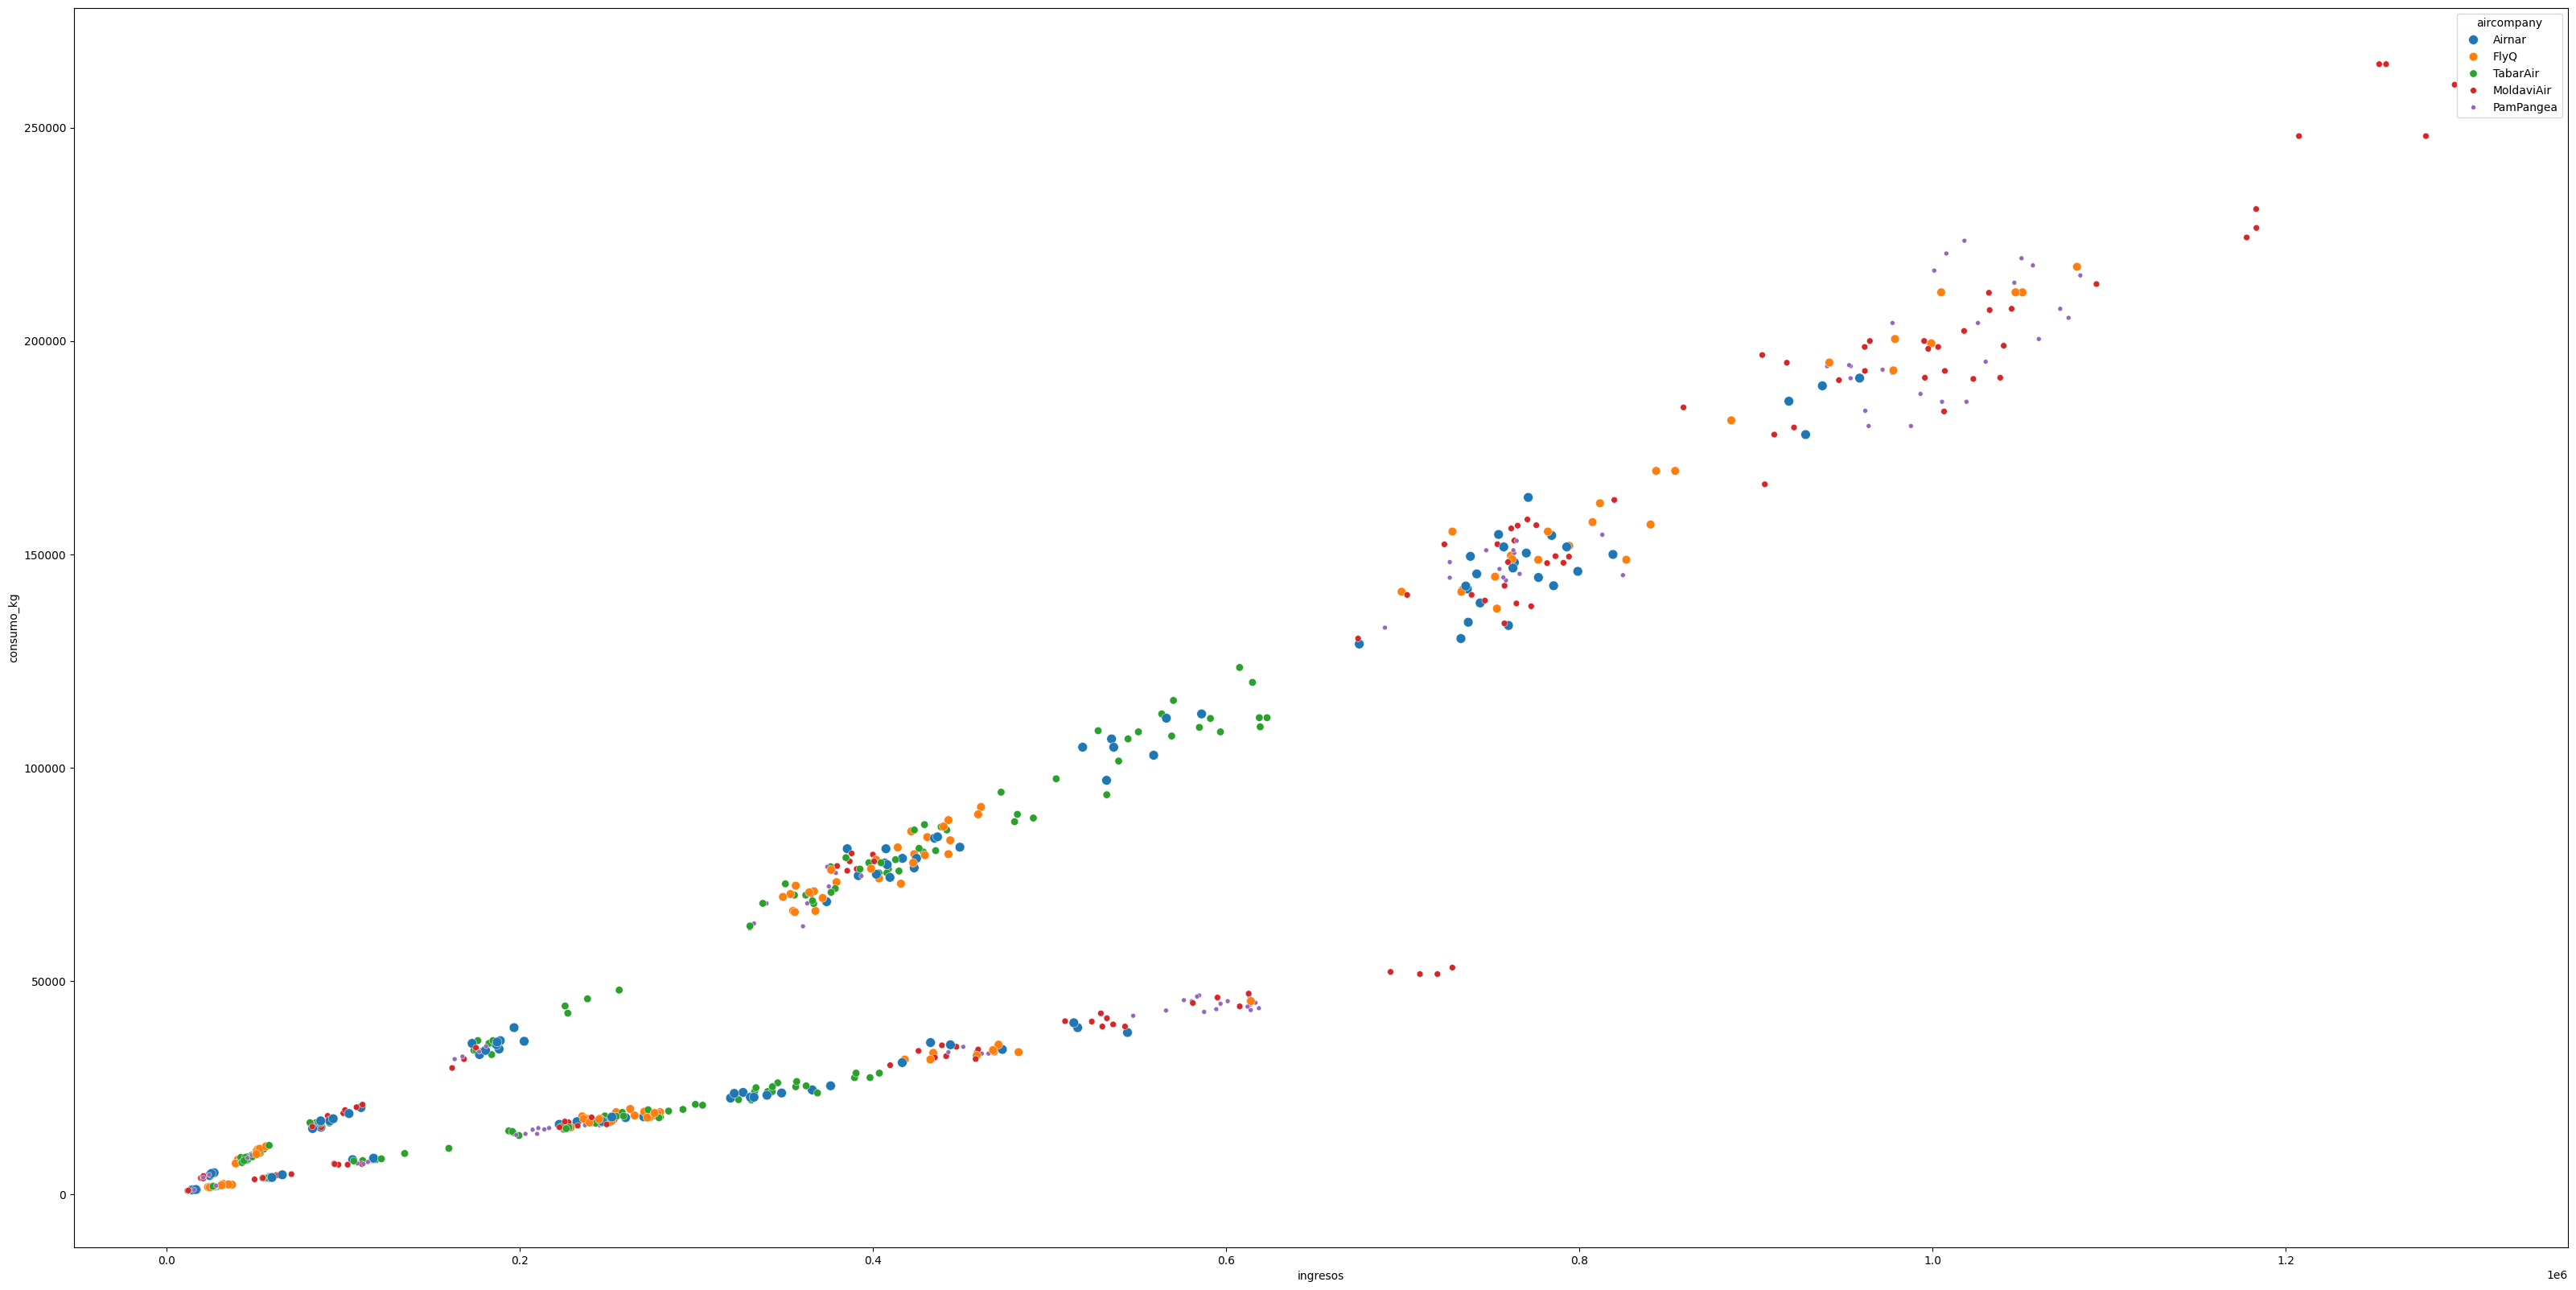

In [97]:
funcion_6(df_viajes_jun,"ingresos","consumo_kg","aircompany")

### Ejercicio 8

Usa la función del ejercicio 6 para pintar la comparativa entre distancia, duración e ingresos. ¿Si quisieras usarla como visualización que quitarías, añadírías o remarcarías?

In [98]:
df_viajes_jun

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23
...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23


In [ ]:
funcion_6(df_viajes_jun,"distancia","consumo_kg","aircompany")